# Attempt to Normalize Occurence Data! Fig 3
We began by finding the best other column to normalize the data on in our case that was 'recordedby' column. With te occurence data normlaized we tried a least means squares regression to provide us with statistics to confirm or bust the idea that temperture has a orrelation to mushroom occurence.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#imports the fungi_data
fungi_data = pd.read_csv("march6_mushroom.csv",  delimiter = "\t")

## NOTE: Drops the columns of data that are not useful to us.
fungi_clean = fungi_data.drop(['datasetKey', 'kingdom', 'phylum', 'order','class', 'taxonRank', 
                               'infraspecificEpithet', 'species', 'license', 'mediaType', 
                               'issue','institutionCode', 'collectionCode','catalogNumber', 'recordNumber',
                               'identifiedBy', 'dateIdentified', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
                               'basisOfRecord',  'elevationAccuracy', 'depth', 'depthAccuracy', 'coordinatePrecision',
                               'elevation', 'countryCode',  'eventDate', 'taxonKey','speciesKey',
                               'gbifID', 'occurrenceID', 'day'], 
                              axis = 1)

fungi_clean = fungi_clean.sort_values('year')
year_num = 2018
data_rh = fungi_clean.loc[fungi_clean['year'] == year_num, 'recordedBy' ]
print(data_rh.nunique(dropna=True))




295


/Users/louis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fungi_clean.head(5)

,family,genus,scientificName,locality,publishingOrgKey,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,month,year,rightsHolder,recordedBy
20958,Cantharellaceae,Pseudocraterellus,Pseudocraterellus undulatus (Pers.) Rauschert,Bökeberg,883ee5d0-9177-423d-a636-0284e8a4de46,55.540330,13.271690,NaN,10.0,1950,NaN,Olof Andersson
21110,Cantharellaceae,Pseudocraterellus,Pseudocraterellus undulatus (Pers.) Rauschert,No locality information available,883ee5d0-9177-423d-a636-0284e8a4de46,55.664343,13.344033,NaN,9.0,1950,NaN,Olof Andersson
21087,Cantharellaceae,Craterellus,Cantharellus lutescens Fr.,"Tolvforsskogen, about 2.5 km NNW of Tolvfors",4c415e40-1e21-11de-9e40-a0d6ecebb8bf,NaN,NaN,NaN,8.0,1950,NaN,J.Ax. Nannfeldt
20954,Cantharellaceae,Pseudocraterellus,Pseudocraterellus undulatus (Pers.) Rauschert,No locality information available,883ee5d0-9177-423d-a636-0284e8a4de46,55.580550,13.254462,NaN,NaN,1950,NaN,Olof Andersson
21056,Cantharellaceae,Pseudocraterellus,Helvella crispa (Scop.) Fr.,Ronneby,4c415e40-1e21-11de-9e40-a0d6ecebb8bf,NaN,NaN,NaN,10.0,1950,NaN,I. Gullbrandson


In [60]:
def DataCall(year_num):
    data_rh = fungi_clean.loc[fungi_clean['year'] == year_num, 'recordedBy' ]
    return data_rh.nunique(dropna=True)

#http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html
# def DataCall(year_num):
#     data_rh = fungi_clean.loc[fungi_clean['year'] == year_num, 'rightsHolder']
#     return data_rh.nunique(dropna=True)

In [61]:
#totals the number of Recorded by per year.
total_month = np.zeros(69)
years = np.arange(1950,2019,1)
totaler = []
for i in years:
    temp = DataCall(i)
    totaler = np.append(totaler, temp)
print(totaler)

[  3.   4.   4.   7.   6.   1.   2.   8.   4.   0.  11.   4.   4.   9.
   5.  10.   6.   6.   4.   0.  13.   5.   8.   3.  15.   4.   2.  16.
  17.  26.  22.  15.  14.   8.  41.  36.  21.  17.  47.  23.  33.  35.
  46.  70.  47.  49.  55.  71.  90.  48.  85.  92.  68.  71.  90. 102.
 103. 107. 138. 132. 185. 235. 153. 162. 253. 260. 288. 501. 295.]


<function matplotlib.pyplot.show(*args, **kw)>

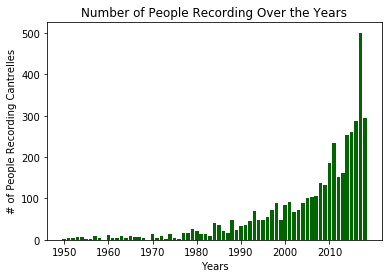

In [63]:
#Plots the total number of people recording data by years
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = "Number of People Recording Over the Years", 
       xticks = np.arange(1950, 2016,10),
       ylabel = "# of People Recording Cantrelles",
       xlabel = "Years")
ax.bar(years, totaler, width = .8, color= 'darkgreen')
plt.savefig("Number_recording.png", dpi=300)
plt.show

### Normalized Data

In [64]:
# normalizes the data from the year (input) and outputs what percent of observation occured in each of the months
def DataCall2(year_range):
    
    mushrooms = []
    
    for i in year_range:
        data_year = fungi_clean.loc[fungi_clean['year'] == i]
        mushrooms = np.append(mushrooms,data_year.shape[0]) 
        
       
    return mushrooms

In [65]:
# Create random data with numpy
import numpy as np

years = np.arange(1950,2019,1)
annual_occurances = DataCall2(years)
    
totaler_3_the_reckoning = annual_occurances/totaler

/Users/louis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [66]:
# removing the NaNs with 0's
totaler_3_the_reckoning[9] = 0
totaler_3_the_reckoning[19] = 0

<function matplotlib.pyplot.show(*args, **kw)>

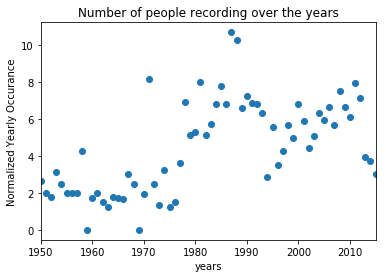

In [67]:
#plots normalized occurence by those recorded by
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.set(title = "Number of people recording over the years", 
       xticks = np.arange(1950, 2016,10),
       ylabel = "Normalized Yearly Occurance",
       xlabel = "years",
       xlim = [1950,2015])
ax.scatter(years, totaler_3_the_reckoning,)
# plt.savefig("peak_occurence_3_14.png", dpi=300)
plt.show



### Normalized occurences correlated to Temperture fig 3


In [68]:
Column1 = years
Column2= np.ones(len(Column1))
A = np.column_stack((Column1, Column2))
columnC = np.array(totaler_3_the_reckoning)
C = np.transpose(columnC)

ps = np.linalg.lstsq(A, C, rcond=None)[0]
p1 = ps[0]
p2 = ps[1]

# Create predicted y values for a range of x values
xhat = years
yhat = p1*xhat + p2

In [69]:
def squared_error(regression_line, data):
    return sum((regression_line - data)*(regression_line - data))

def r_squared(ys_orig,ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

Our R-squared value is: 0.2585910088463096


<function matplotlib.pyplot.show(*args, **kw)>

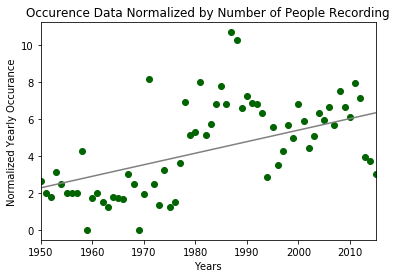

In [75]:
import math as math
print("Our R-squared value is:", r_squared(totaler_3_the_reckoning,yhat))
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.set(title = "Occurence Data Normalized by Number of People Recording", 
       xticks = np.arange(1950, 2016,10),
       ylabel = "Normalized Yearly Occurance",
       xlabel = "Years",
       xlim = [1950,2015])
ax.scatter(years, totaler_3_the_reckoning, color = 'darkgreen')
ax.plot(xhat, yhat, color="grey")
plt.savefig("normalizedrecording.png", dpi=300)


plt.show

